<a href="https://colab.research.google.com/github/mikulicmateo/StockPrediction/blob/main/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
#from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot


def create_model():
    l_model = Sequential()
    l_model.add(Input(32))
    l_model.add(Dense(128, activation="linear"))
    l_model.add(Dense(128, activation="relu"))
    l_model.add(Dense(64, activation="linear"))
    l_model.add(Dense(32, activation="relu"))
    l_model.add(Dense(16, activation="linear"))
    l_model.add(Dense(8, activation="relu"))
    l_model.add(Dense(4, activation="linear"))
    l_model.add(Dense(2, activation="relu"))
    l_model.add(Dense(1, activation="linear"))
    l_model.compile(Adam(learning_rate=0.0001), loss="mean_squared_error", metrics=['mse', 'mae','msle'])
    l_model.summary()
    return l_model


def calculate_typical_price(row):
    typical_price = (row[1] + row[2] + row[3])/3
    return typical_price



In [2]:
with open("/content/drive/MyDrive/dataset.json") as json_file:
    dataset = json.loads(json_file.read())

In [3]:
print(type(dataset))
numOfKey = 0
for i in dataset.keys():
    numOfKey += 1

arr = []
data = np.empty(shape=(0, 8))
listOfArrays = []
for j in dataset.keys():
    print("************** ", str(j))
    for i in dataset[j]:
        arr = float(i.get('open')), float(i.get('high')), float(i.get('low')), float(i.get('close')), \
              float(i.get('volume')), float(i.get('rsi')), float(i.get('sma')), float(i.get('ema'))
        data = np.append(data, [arr], axis=0)
    print(data.shape)
    listOfArrays.append(data)


<class 'dict'>
**************  IBM
(5549, 8)
**************  AMD
(11098, 8)
**************  TSLA
(13967, 8)
**************  PFE
(19516, 8)
**************  MRK
(25065, 8)
**************  F
(30614, 8)
**************  CROX
(34587, 8)
**************  DNA
(34737, 8)
**************  JD
(36625, 8)
**************  JBLU
(41562, 8)
**************  OXY
(47111, 8)
**************  X
(52660, 8)
**************  KO
(58209, 8)
**************  NCLH
(60434, 8)
**************  AMZN
(65983, 8)
**************  BBD
(71015, 8)
**************  BAC
(76564, 8)
**************  NIO
(77367, 8)


In [4]:
from tensorflow.python.ops.numpy_ops.np_array_ops import shape
input_data = np.empty((0,32))
output_data = np.empty((0,))
for company in listOfArrays:
    num_rows, _ = company.shape
    for i in range(num_rows):
        if i + 4 > num_rows-1:
            print(company[i])
            break
        add = np.array([company[i], company[i + 1], company[i + 2], company[i + 3]]).reshape(1,32)
        input_data=np.append(input_data, add, axis=0)
        add = np.array([calculate_typical_price(company[i + 4])])
        output_data=np.append(output_data, add, axis=0)

[1.11620e+02 1.11940e+02 1.07560e+02 1.09000e+02 1.25888e+07 5.87323e+01
 5.96682e+01 6.00730e+01]
[2.93800e+01 2.96300e+01 2.81300e+01 2.92500e+01 3.10280e+06 6.48830e+01
 1.36140e+01 1.34457e+01]
[1.99000e+01 1.99800e+01 1.94500e+01 1.96000e+01 8.12700e+05 4.08265e+01
 3.94660e+00 4.01680e+00]
[3.36300e+01 3.42500e+01 3.33800e+01 3.38800e+01 1.02609e+07 3.58435e+01
 1.56701e+01 1.57471e+01]
[7.16900e+01 7.26900e+01 7.08800e+01 7.14400e+01 5.28720e+06 3.64842e+01
 3.24296e+01 3.22271e+01]
[5.006000e+01 5.019000e+01 4.856000e+01 4.894000e+01 4.320687e+06
 3.488940e+01 2.190790e+01 2.188320e+01]
[2.30000e+01 2.32500e+01 2.20300e+01 2.20600e+01 8.90500e+05 3.09939e+01
 1.30380e+01 1.29099e+01]
[9.89000e+00 9.89000e+00 9.86000e+00 9.88000e+00 7.57434e+05 3.92852e+01
 1.00256e+01 1.00225e+01]
[3.04000e+01 3.04100e+01 2.85000e+01 2.89600e+01 6.10820e+06 6.72822e+01
 2.69360e+01 2.66881e+01]
[4.37000e+01 4.44900e+01 4.35500e+01 4.44000e+01 5.36300e+04 4.91709e+01
 1.38475e+01 1.36840e+01]
[1

In [6]:
print(input_data.shape)
print(output_data.shape)

(762591, 32)
(762591,)


In [24]:
model = create_model()
history = model.fit(x=input_data, y=output_data, batch_size=256,validation_split=0.1, epochs=100, verbose=1, shuffle=True)#, callbacks=EarlyStopping(monitor='loss', patience=3))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 128)               4224      
                                                                 
 dense_78 (Dense)            (None, 128)               16512     
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 dense_80 (Dense)            (None, 32)                2080      
                                                                 
 dense_81 (Dense)            (None, 16)                528       
                                                                 
 dense_82 (Dense)            (None, 8)                 136       
                                                                 
 dense_83 (Dense)            (None, 4)                

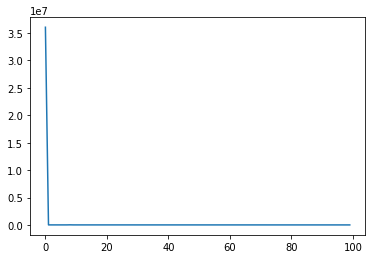

In [25]:
pyplot.plot(history.history['mse'])
pyplot.show()

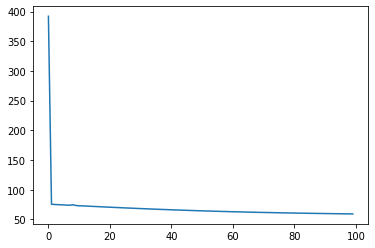

In [26]:
pyplot.plot(history.history['mae'])
pyplot.show()

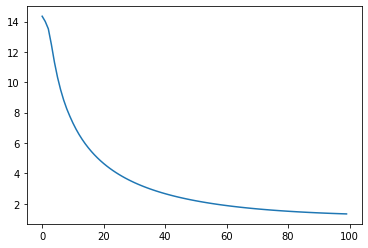

In [27]:
pyplot.plot(history.history['msle'])
pyplot.show()

In [28]:
with open("/content/drive/MyDrive/dataset-predict.json") as json_file:
    dataset_test = json.loads(json_file.read())

In [33]:
arr_test = []
data_test = np.empty(shape=(0, 8))
test_listOfArrays = []
for j in dataset_test.keys():
    print("************** ", str(j))
    for i in dataset_test[j]:
        arr_test = float(i.get('open')), float(i.get('high')), float(i.get('low')), float(i.get('close')), \
              float(i.get('volume')), float(i.get('rsi')), float(i.get('sma')), float(i.get('ema'))
        data_test = np.append(data, [arr], axis=0)
    print(data_test.shape)
    test_listOfArrays.append(data)

<class 'dict'>
**************  IBM
(5, 8)


In [38]:
test_input_data = np.empty((0,32))
test_output_data = np.empty((0,))
for company in test_listOfArrays:
    num_rows, _ = company.shape
    for i in range(num_rows):
        if i + 4 > num_rows-1:
            print(company[i])
            break
        add_test = np.array([company[i], company[i + 1], company[i + 2], company[i + 3]]).reshape(1,32)
        test_input_data=np.append(test_input_data, add_test, axis=0)
        add_test = np.array([calculate_typical_price(company[i + 4])])
        test_output_data=np.append(test_output_data, add_test, axis=0)

[1.11620e+02 1.11940e+02 1.07560e+02 1.09000e+02 1.25888e+07 5.87323e+01
 5.96682e+01 6.00730e+01]


In [46]:
print(test_input_data.shape)
print(test_output_data.shape)
print(test_input_data)
print(test_output_data)

(1, 32)
(1,)
[[1.08120e+02 1.12750e+02 1.06560e+02 1.09700e+02 7.13520e+06 5.92444e+01
  6.01216e+01 6.03414e+01 1.11620e+02 1.11940e+02 1.07560e+02 1.09000e+02
  1.25888e+07 5.87323e+01 5.96682e+01 6.00730e+01 1.20500e+02 1.22120e+02
  1.12250e+02 1.13370e+02 1.66430e+07 6.35152e+01 5.92612e+01 5.98159e+01
  1.16250e+02 1.21000e+02 1.15500e+02 1.18280e+02 8.13980e+06 6.96315e+01
  5.88181e+01 5.93264e+01]]
[117.08333333]


In [45]:
prediction = model.predict(test_input_data)
print(prediction)
print(test_output_data[0])

[[25.581577]]
117.08333333333333
